# Creating the KG

In [1]:
import pandas as pd
from neo4j import GraphDatabase
from dotenv import load_dotenv
import os

In [2]:
# Neo4j connection details

load_dotenv('../KG/db.env')

uri = os.getenv("NEO4J_URI")
user = os.getenv("NEO4J_USER")
password = os.getenv("NEO4J_PASSWORD")

# Creating a Neo4j Driver Instance
driver = GraphDatabase.driver(uri, auth=(user, password))

# Verifying Connection
try:
    driver.verify_connectivity()
except Exception as err:
    print(f"Error: {err}, type: {type(err)}")

## Creating Nodes

In [20]:
# Unique ID Constraints

person_id_constraint = "CREATE CONSTRAINT FOR (p:Person) REQUIRE p.respondentId IS UNIQUE"
biomarker_id_constraint = "CREATE CONSTRAINT FOR (b:BloodBiomarker) REQUIRE b.biomarkerId IS UNIQUE"
protein_id_constraint = "CREATE CONSTRAINT FOR (p:BloodProtein) REQUIRE p.uniprotId IS UNIQUE"
disease_id_constraint = "CREATE CONSTRAINT FOR (d:Disease) REQUIRE d.mondoId IS UNIQUE"

try:
    with driver.session() as session:
        session.run(person_id_constraint)
        session.run(biomarker_id_constraint)
        session.run(protein_id_constraint)
        session.run(protein_id_constraint)
        
except Exception as err:
    print(f"Error: {err}, type: {type(err)}")

In [4]:
persons = pd.read_csv('../KG/Data/person.csv')
persons = persons.to_dict('records')

In [5]:
create_person_nodes_query = "CREATE (p:Person {respondentId: $respondentId, gender: $gender, age: $age, bmi: $bmi})"

with driver.session() as session:    
    for person in persons:
        session.run(create_person_nodes_query, person)
    print ("Created 'Person' Nodes")

Created 'Person' Nodes


In [6]:
blood_biomarkers = pd.read_csv('../KG/Data/blood_biomarker.csv')
blood_biomarkers = blood_biomarkers.to_dict('records')

In [7]:
create_biomarker_nodes_query = (
"CREATE (b:BloodBiomarker {name: $name, unit: $unit, type: $type, biomarkerId: $biomarkerId})"
)

with driver.session() as session:   
    for blood_biomarker in blood_biomarkers:
        session.run(
            create_biomarker_nodes_query,
            name=blood_biomarker['name'],
            unit=blood_biomarker['unit'],
            type=blood_biomarker['type'],
            biomarkerId=blood_biomarker['biomarkerId']
        )
    print ("Created 'BloodBiomarker' Nodes")

Created 'BloodBiomarker' Nodes


In [8]:
blood_proteins = pd.read_csv('../KG/Data/blood_protein.csv')
blood_proteins = blood_proteins.to_dict('records')

In [9]:
create_protein_nodes_query = "CREATE (b:BloodProtein {name: $name, unit: $unit, uniprotId: $uniprotId})"

with driver.session() as session:
    for blood_protein in blood_proteins:
        session.run(create_protein_nodes_query,
                    name=blood_protein['name'],
                    unit=blood_protein['unit'],
                    uniprotId=blood_protein['uniprotId'])
    print ("Created 'BloodProtein' Nodes")

Created 'BloodProtein' Nodes


In [10]:
diseases = pd.read_csv('../KG/Data/disease.csv')
diseases = diseases.to_dict('records')

In [11]:
create_disease_nodes_query = "CREATE (d:Disease {name: $name, type: $type, mondoId: $mondoId})"

with driver.session() as session:
    for disease in diseases:
        session.run(create_disease_nodes_query, 
                    name=disease['name'], 
                    type=disease['type'], 
                    mondoId=disease['mondoId'])
    print ("Created 'Disease' Nodes")

Created 'Disease' Nodes


## Creating Relationships

In [12]:
person_has_blood_biomarker = pd.read_csv('../KG/Data/person_has_blood_biomarker.csv')
person_has_blood_biomarker = person_has_blood_biomarker.to_dict('records')

In [13]:
create_has_blood_biomarker_relation_query = ("MATCH (p:Person {respondentId: $respondentId})"
                "MATCH (b:BloodBiomarker {biomarkerId: $biomarkerId})"
                "CREATE (p)-[:HAS {value: $value}]->(b)")

with driver.session() as session:
    for relation in person_has_blood_biomarker:
        session.run(
            create_has_blood_biomarker_relation_query,
            respondentId=relation['respondentId'],
            biomarkerId=relation['biomarkerId'],
            value=relation['value']
        )
    print ("Created 'HAS' Realtionships between Person and BloodBiomarker")

Created 'HAS' Realtionships between Person and BloodBiomarker


In [14]:
person_has_blood_protein = pd.read_csv('../KG/Data/person_has_blood_protein.csv')
person_has_blood_protein = person_has_blood_protein.to_dict('records')

In [15]:
create_has_protein_relation_query = (
    "MATCH (p:Person {respondentId: $respondentId})"
    "MATCH (u:BloodProtein {uniprotId: $uniprotId})"
    "CREATE (p)-[:HAS {value: $value}]->(u)"
)

with driver.session() as session:
    for relation in person_has_blood_protein:
        session.run(
            create_has_protein_relation_query,
            respondentId=relation['respondentId'],
            uniprotId=relation['uniprotId'],
            value=relation['value']
        )
    print ("Created 'HAS' Realtionships between Person and BloodProtein")

Created 'HAS' Realtionships between Person and BloodProtein


In [16]:
person_suffers_from_disease = pd.read_csv('../KG/Data/person_suffers_from_disease.csv')
person_suffers_from_disease = person_suffers_from_disease.to_dict('records')

In [17]:
create_suffers_from_disease_relation_query = (
    "MATCH (p:Person {respondentId: $respondentId})"
    "MATCH (d:Disease {mondoId: $mondoId})"
    "CREATE (p)-[:SUFFERS_FROM {status: $status}]->(d)"
)

with driver.session() as session:
    for relation in person_suffers_from_disease:
        session.run(
            create_suffers_from_disease_relation_query,
            respondentId=relation['respondentId'],
            mondoId=relation['mondoId'],
            status=relation['status']
        )
    print ("Created 'SUFFERS_FROM' Realtionships between Person and Disease")

Created 'SUFFERS_FROM' Realtionships between Person and Disease


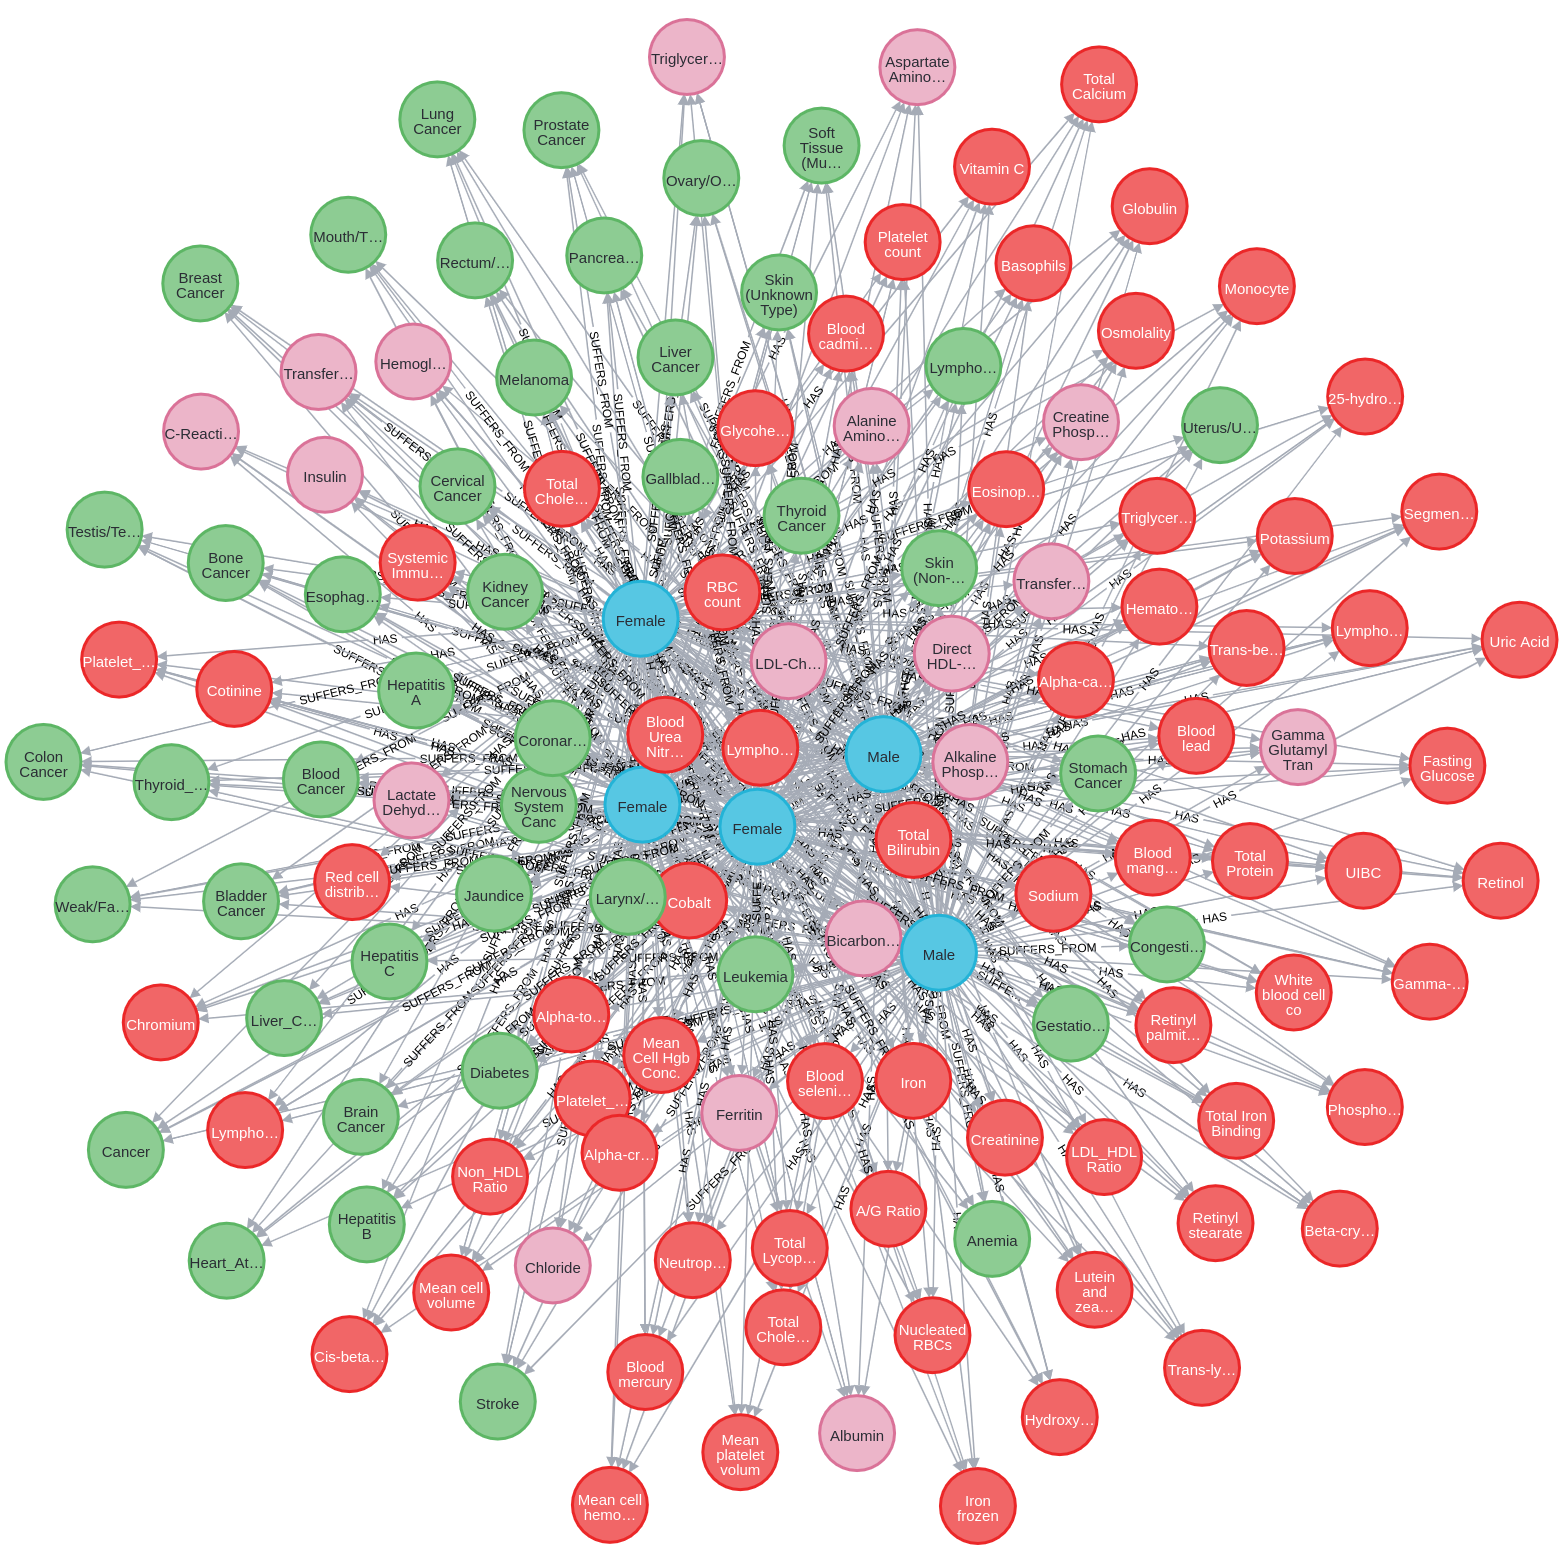

In [27]:
# A sample snapshot of the graph

from IPython.display import Image
Image(filename='../KG/KG_sample_snapshot.png', width = 750, height = 550)